In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/hourly-energy-consumption/PJME_hourly.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [3]:
print(df.describe())

                            Datetime        PJME_MW
count                         145366  145366.000000
mean   2010-04-18 03:25:25.999202048   32080.222831
min              2002-01-01 01:00:00   14544.000000
25%              2006-02-23 14:15:00   27573.000000
50%              2010-04-18 04:30:00   31421.000000
75%              2014-06-10 18:45:00   35650.000000
max              2018-08-03 00:00:00   62009.000000
std                              NaN    6464.012166


In [4]:
print(df.isnull().sum())

Datetime    0
PJME_MW     0
dtype: int64


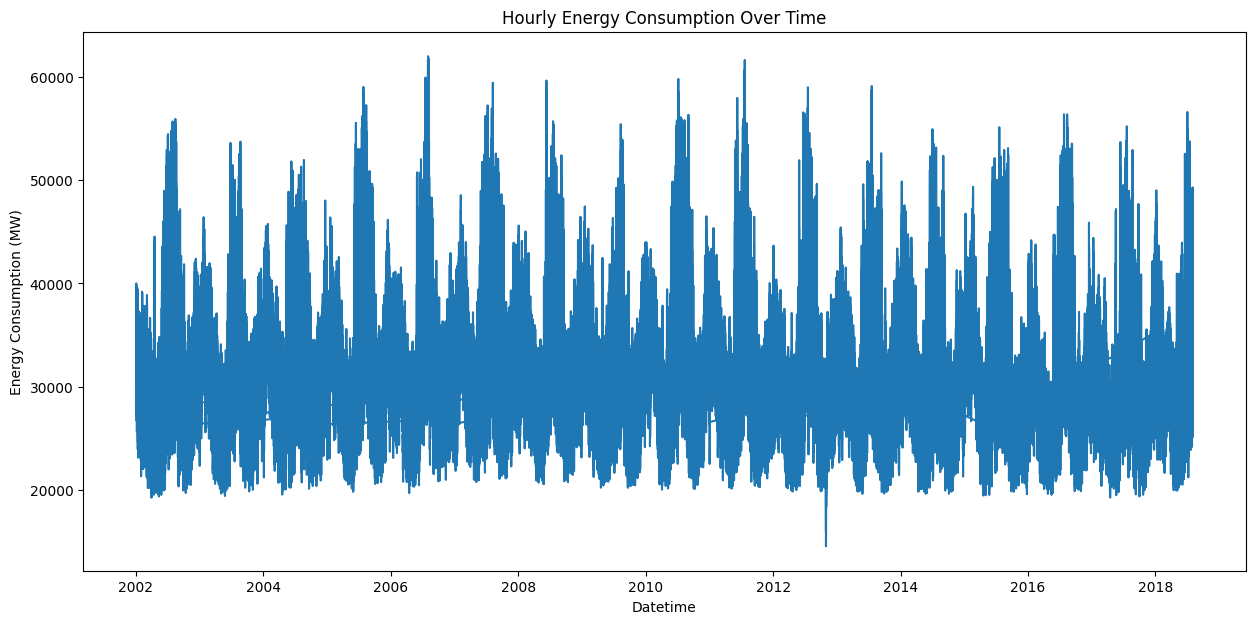

In [5]:
import matplotlib.pyplot as plt

df['Datetime'] = pd.to_datetime(df['Datetime'])
plt.figure(figsize=(15, 7))
plt.plot(df['Datetime'], df['PJME_MW'])
plt.title('Hourly Energy Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.show()

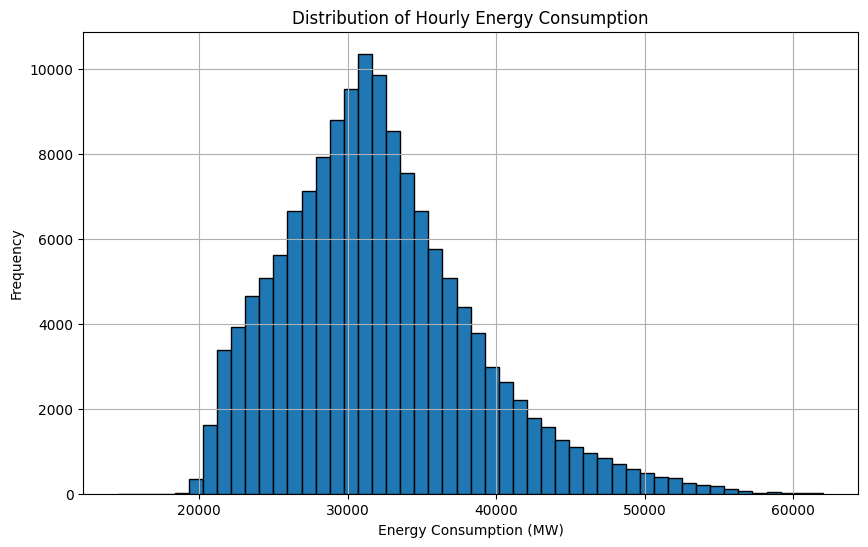

In [6]:
plt.figure(figsize=(10,6))
df['PJME_MW'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Hourly Energy Consumption')
plt.xlabel('Energy Consumption (MW)')
plt.ylabel('Frequency')
plt.show()

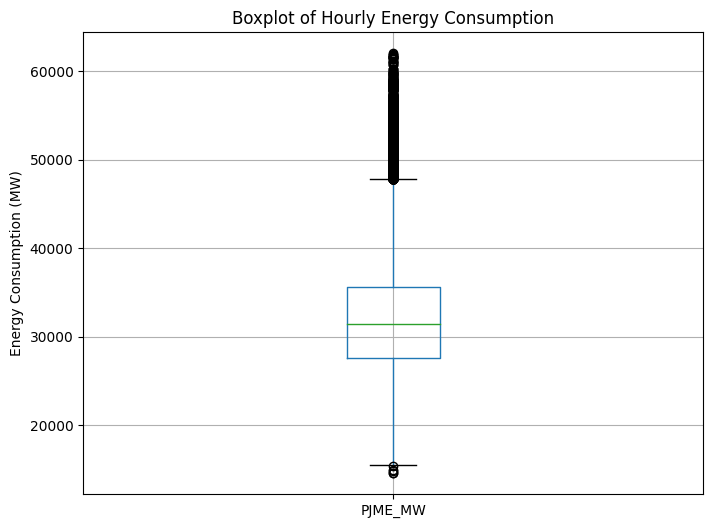

In [7]:
plt.figure(figsize=(8,6))
df.boxplot(column='PJME_MW')
plt.title('Boxplot of Hourly Energy Consumption')
plt.ylabel('Energy Consumption (MW)')
plt.show()

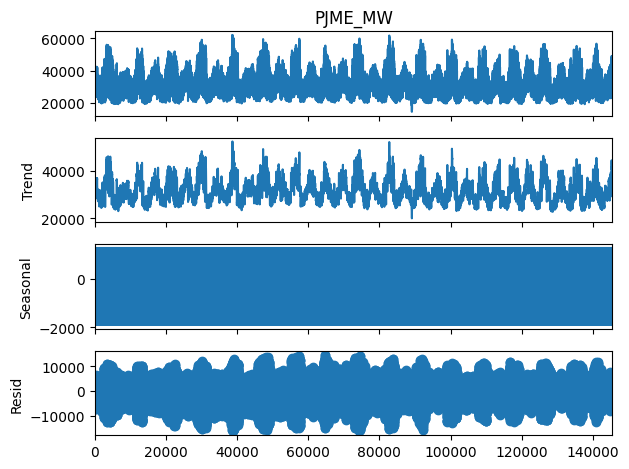

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['PJME_MW'], model='additive', period=24)
result.plot()
plt.show()

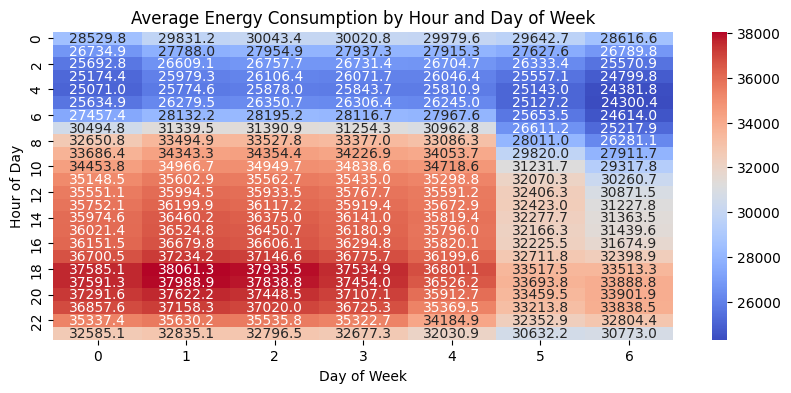

In [9]:
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek

pivot_table = df.pivot_table(values='PJME_MW', index='Hour', columns='DayOfWeek', aggfunc='mean')
plt.figure(figsize=(10,4))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Average Energy Consumption by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

In [10]:
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['Hour', 'Day', 'Month']]
y = df['PJME_MW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 5616.43440752047
